In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import time
import chardet

start = time.process_time()
df = pd.read_csv(r"data.csv",encoding='ISO-8859-1')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [2]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])
df["WeekDay"]=df["InvoiceDate"].dt.weekday
df.dropna(inplace=True)
df.loc[df["WeekDay"] == 0, "WeekDay"]="Monday"
df.loc[df["WeekDay"] == 1, "WeekDay"]="Tuesday"
df.loc[df["WeekDay"] == 2, "WeekDay"]="Wednesday"
df.loc[df["WeekDay"] == 3, "WeekDay"]="Thursday"
df.loc[df["WeekDay"] == 4, "WeekDay"]="Friday"
df.loc[df["WeekDay"] == 5, "WeekDay"]="Saturday"
df.loc[df["WeekDay"] == 6, "WeekDay"]="Sunday"
df["Money"]=df["Quantity"]*df["UnitPrice"]
df["Date"] = df["InvoiceDate"].dt.date
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,WeekDay,Money,Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Wednesday,15.30,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,20.34,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Wednesday,22.00,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,20.34,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,20.34,2010-12-01
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,Friday,10.20,2011-12-09
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,Friday,12.60,2011-12-09
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,Friday,16.60,2011-12-09
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,Friday,16.60,2011-12-09


In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
## 打印出包含排名前 10 的产品信息的 df2 数据框。
def Top10Products():
    df2=df[["Description","Quantity"]]
    df2=df2.groupby(["Description"]).sum().reset_index()
    df2=df2.sort_values("Quantity",ascending=False).head(10)
#     print("1)Top 10 products ordered by individuals:")
#     print(df2)
    plt.figure(dpi= 200 ,figsize=(12, 8))
    ax = sns.barplot(data=df2,y="Description",x="Quantity",palette="icefire")
    for i in ax.containers:
        ax.bar_label(i,)
    ax.set_title("Top 10 Best Selling Products")
    plt.xlabel("Total Quantity")
    plt.ylabel("Products")
    plt.tight_layout()
    plt.show()
## 打印出包含排名前 10 位顾客信息的 RESULT 数据框。
def Top10CustomersWhoSpentMostMoney():##花费最多金钱的十大客户()：

    CustomersSpendings = pd.DataFrame(df["UnitPrice"]*df["Quantity"],columns = ["TotalSpending"])
    CustomersSpendings["CustomerID"] =df["CustomerID"]
    Listof = pd.DataFrame(CustomersSpendings.groupby("CustomerID").sum())
    Sorted = Listof.sort_values("TotalSpending",ascending = False)
    RESULT = Sorted.head(n=10)
#     print("2)Here is the list of Top 10 customers who spent the most money : ")
#     print(RESULT)
    plt.figure(dpi= 200 ,figsize=(12, 8))
    ax = sns.barplot(data=RESULT,y="TotalSpending",x="CustomerID",palette="icefire")
    for i in ax.containers:
        ax.bar_label(i,)
    ax.set_title("the list of Top 10 customers who spent the most money")
    plt.xlabel("CustomerID")
    plt.ylabel("TotalSpending")
    plt.tight_layout()
    plt.show()
## 函数的功能是找出下单量最多的 5 个日期。
def Top5Dates():
    DateGroup = df.groupby(["Date"])
    List =pd.DataFrame(DateGroup.nunique())
    sortedlist = List["InvoiceNo"].sort_values(ascending = False)
    top5 = sortedlist.head(5)
    print("3) Top 5 dates in which the greatest number of orders were placed: ")
    print(top5)

def AverageNumbersOfOrdersEachDay():## 平均每日订单数量()：
    days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Sunday"]
    print("4) Average Numbers Of Orders Each Day: ")

    # Filter for relevant columns and remove duplicates
    df5 = df[["WeekDay", "InvoiceNo", "Date"]].drop_duplicates("InvoiceNo")

    # Count orders by day (assuming "Date" is a datetime column)
    df5 = df5.groupby("WeekDay")["InvoiceNo"].count().reset_index()

    # No need to convert "WeekDay" again, it's already grouped
    df_average = df5.groupby("WeekDay").mean().reset_index()

    # Access the average count of "InvoiceNo" for each day
    average_orders_per_day = df_average["InvoiceNo"]
    for day in days:
        # Use the corresponding day's average (assuming "days" order matches "WeekDay")
        average_count = average_orders_per_day.loc[days.index(day)]
        print("Average number of orders placed on", day, ":", int(average_count))
def MostOrderedProductForSpecificDay():
    while True:
        year = int(input("Please enter year: "))
        if year < 2010 or year > 2011:
            print("Please enter 2010 or 2011")
            continue
        break

    while True:
        month = int(input("Please enter month: "))
        if month < 1 or month > 12:
            print("Enter a number between [1,12]")
            continue
        break
    while True:
        day = int(input("Please enter day: "))
        if month == 1 or month == 3 or month == 5 or month == 7 or month == 8 or month == 10 or month == 12:
            if day < 0 or day > 31:
                print("Enter a number between [1,31]")
                continue
            break
        elif month == 2:
            if day < 0 or day > 28:
                print("Enter a number between [1,28]")
                continue
            break
        else:
            if day < 0 or day > 30:
                print("Enter a number between [1,30]")
                continue
            break

    date1 = pd.to_datetime(f"{year}-{month:02d}-{day:02d}").date()
    df1 = df[["Date", "Description", "Quantity"]]
    df1 = df1.loc[df1["Date"] == date1]
    df1 = df1.groupby("Description")["Quantity"].sum().reset_index()
    df1 = df1.sort_values("Quantity", ascending=False).head(1)
    print("5)Most ordered product for", date1, "is:", df1)

C:\Users\LWY520\AppData\Local\Temp\ipykernel_1384\2064667862.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df2,y="Description",x="Quantity",palette="icefire")


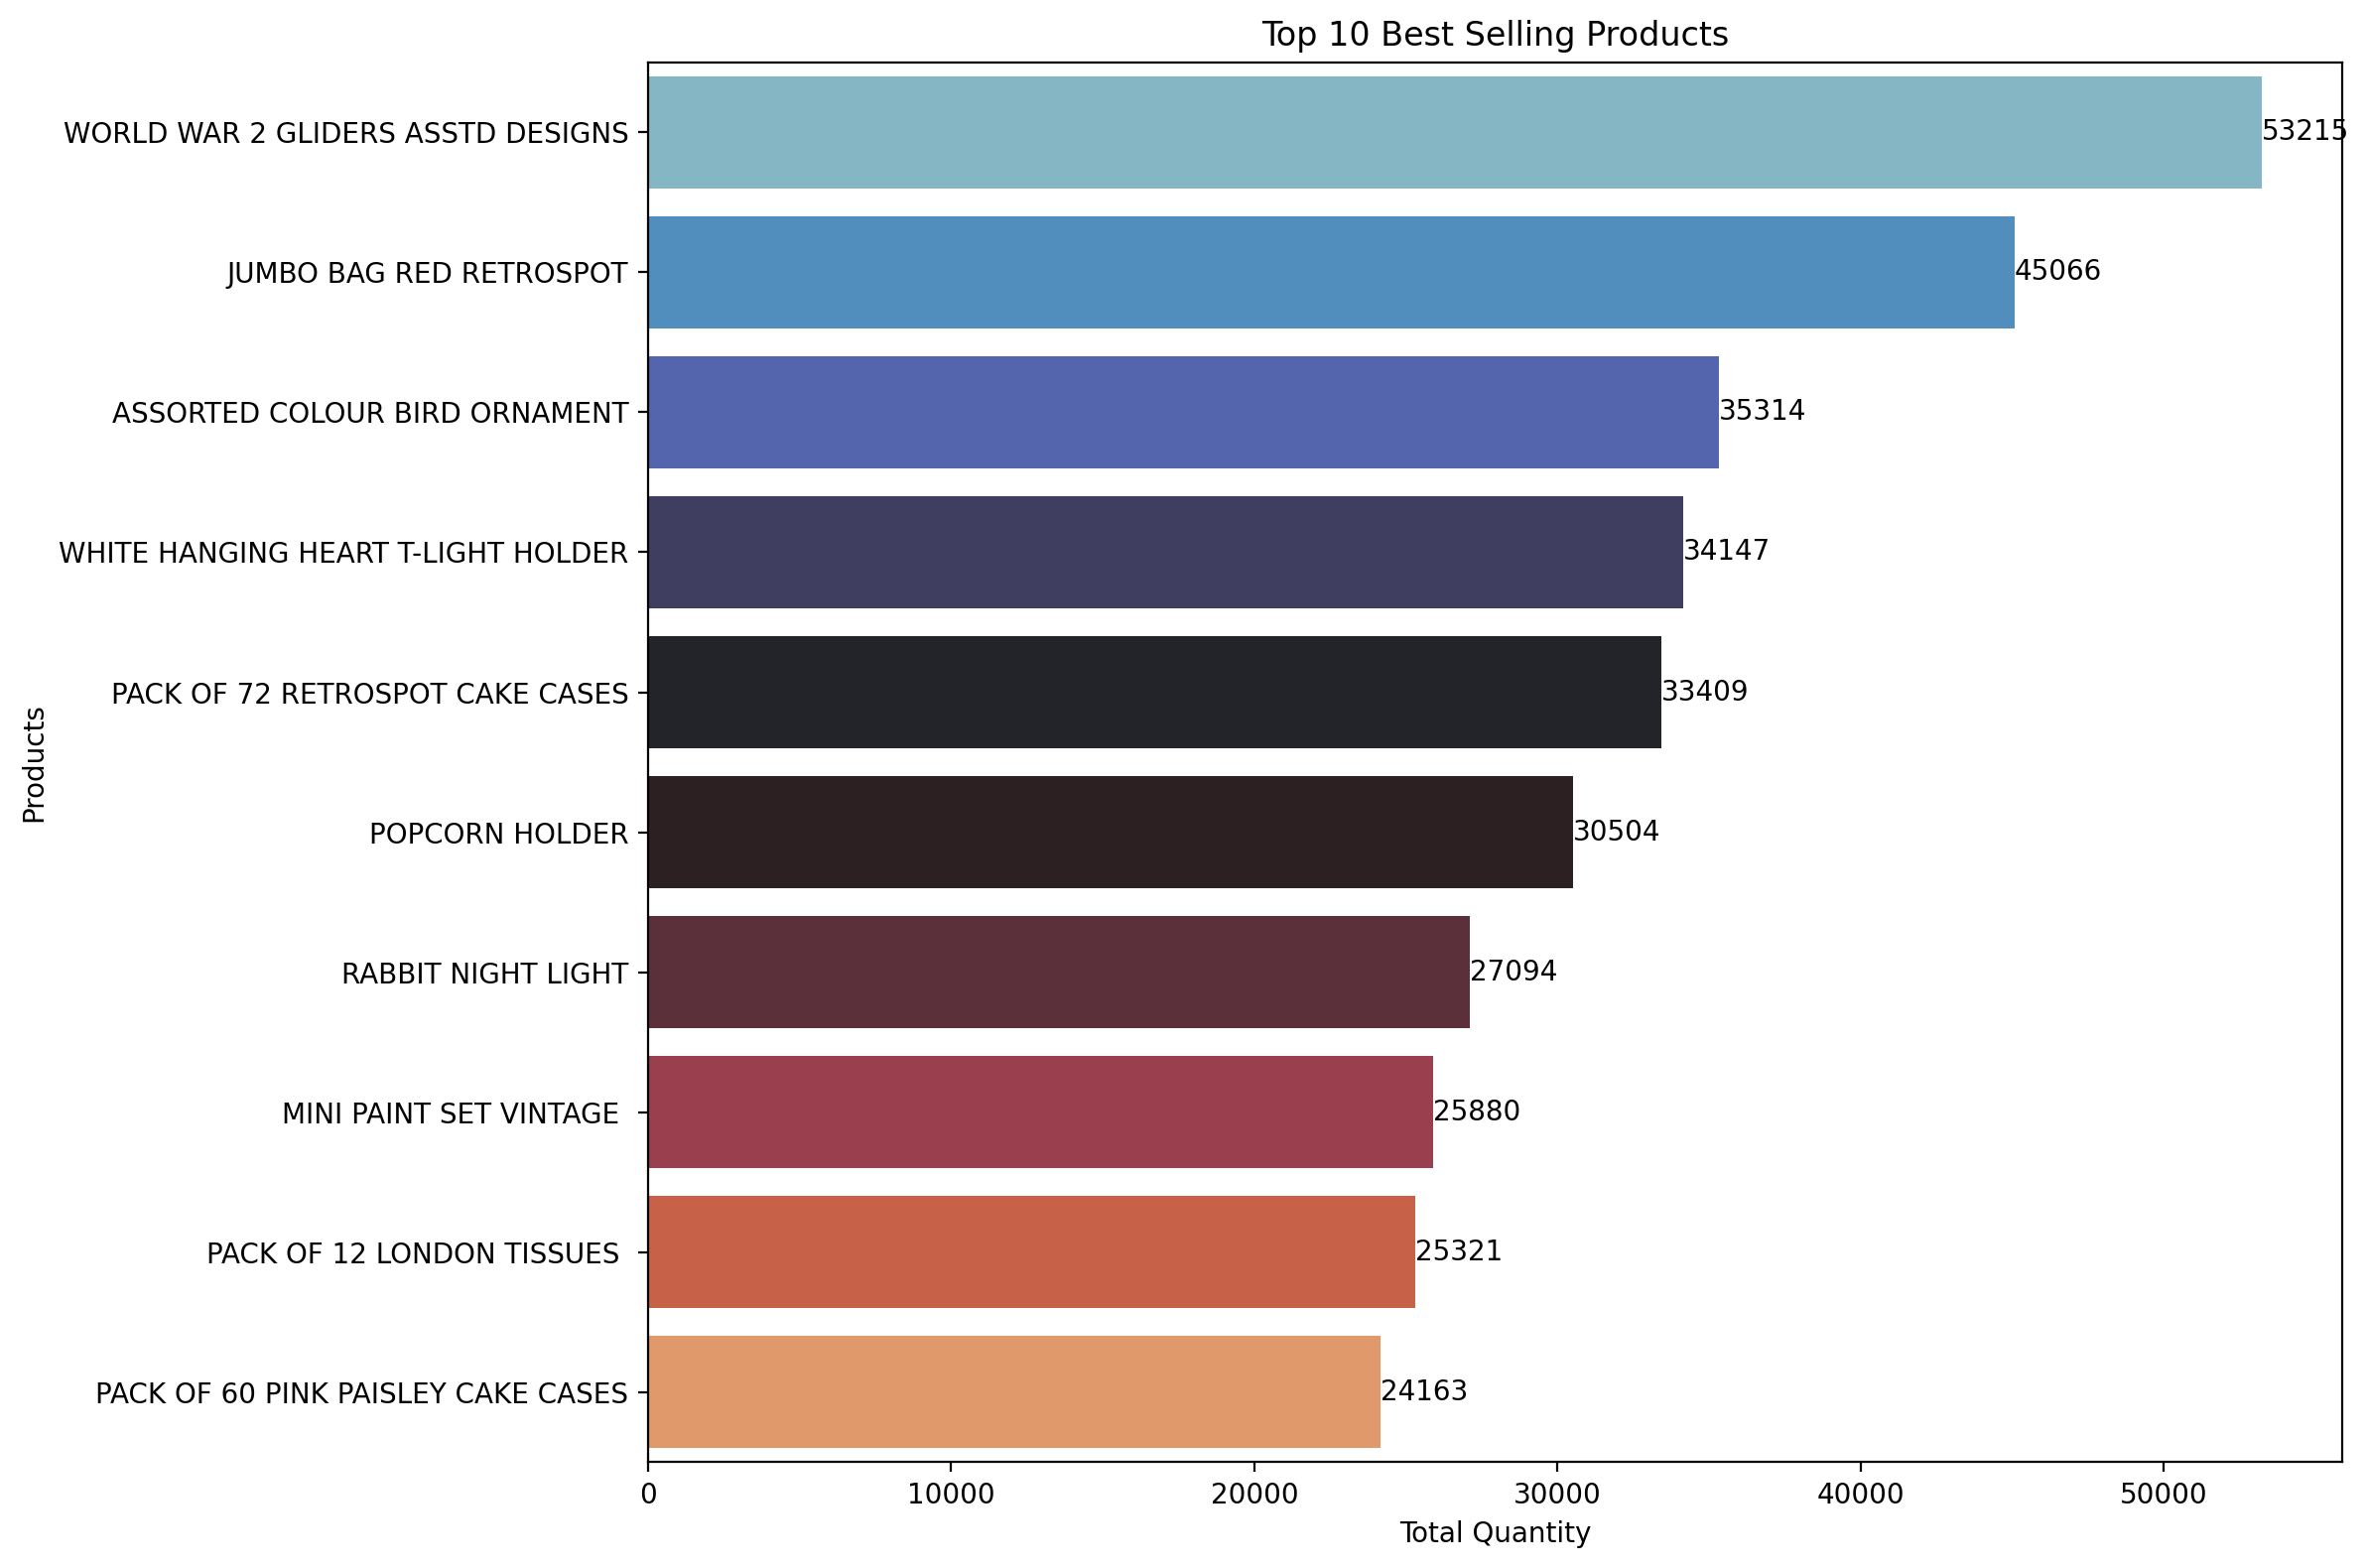

In [35]:
Top10Products() ##打印出包含排名前 10 的产品信息的 df2 数据框。

C:\Users\LWY520\AppData\Local\Temp\ipykernel_1384\540846053.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=RESULT,y="TotalSpending",x="CustomerID",palette="icefire")


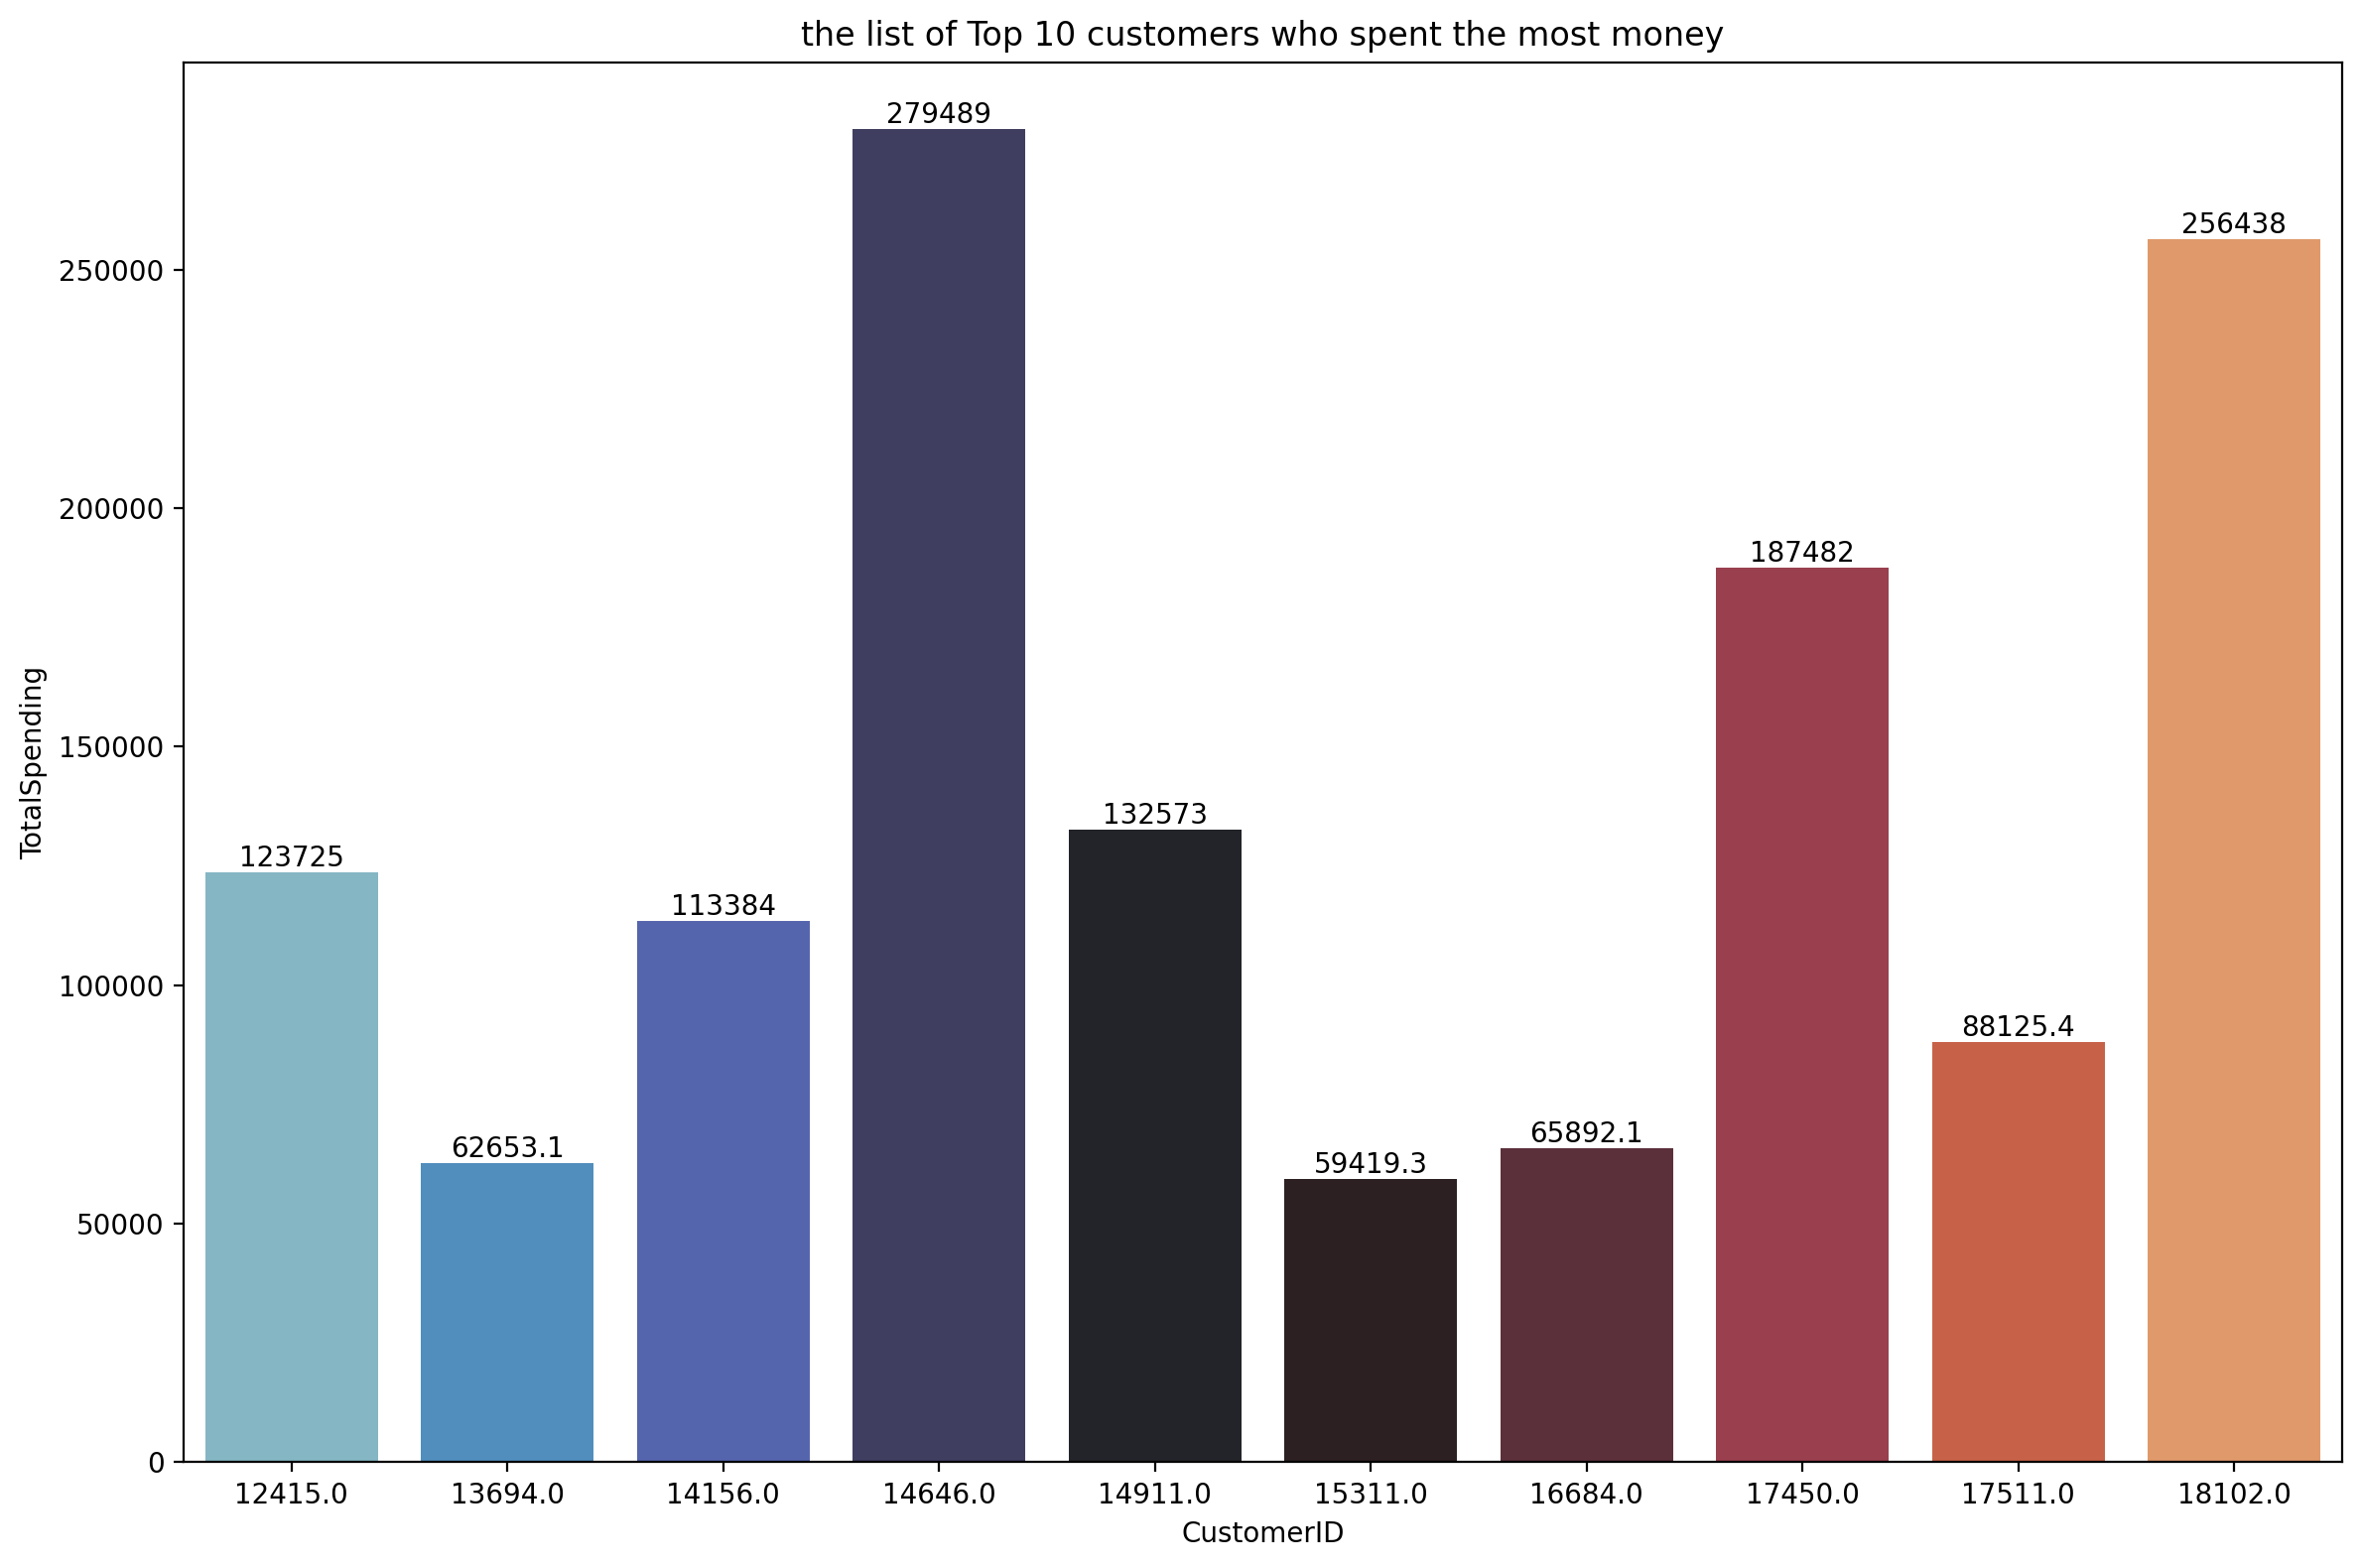

In [43]:
Top10CustomersWhoSpentMostMoney() ##花费最多金钱的十大客户()：

In [39]:
Top5Dates() ##函数的功能是找出下单量最多的 5 个日期。

3) Top 5 dates in which the greatest number of orders were placed: 
Date
2011-10-06    180
2011-12-01    164
2011-11-10    161
2010-12-02    160
2011-11-17    154
Name: InvoiceNo, dtype: int64


In [14]:
AverageNumbersOfOrdersEachDay() ## 平均每日订单数量()：

4) Average Numbers Of Orders Each Day: 
Average number of orders placed on Monday : 3356
Average number of orders placed on Tuesday : 3512
Average number of orders placed on Wednesday : 2342
Average number of orders placed on Thursday : 4978
Average number of orders placed on Friday : 3892
Average number of orders placed on Sunday : 4110


In [15]:
MostOrderedProductForSpecificDay()##指定日期上订购最多的产品date1并显示其信息以及日期

Please enter year: 2011
Please enter month: 3
Please enter day: 13
5)Most ordered product for 2011-03-13 is:             Description  Quantity
53  BROCADE RING PURSE        108


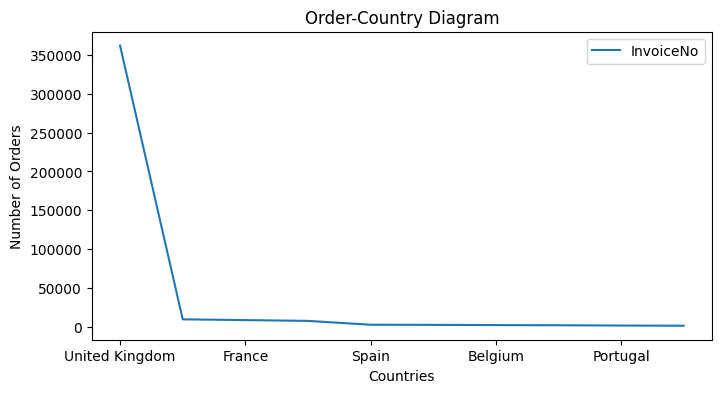

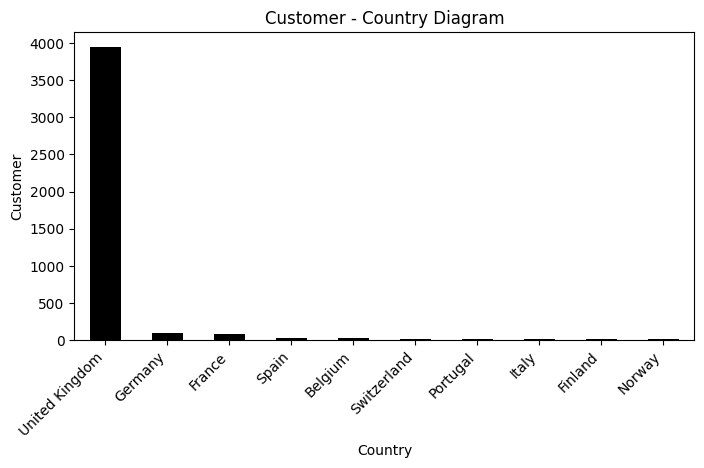

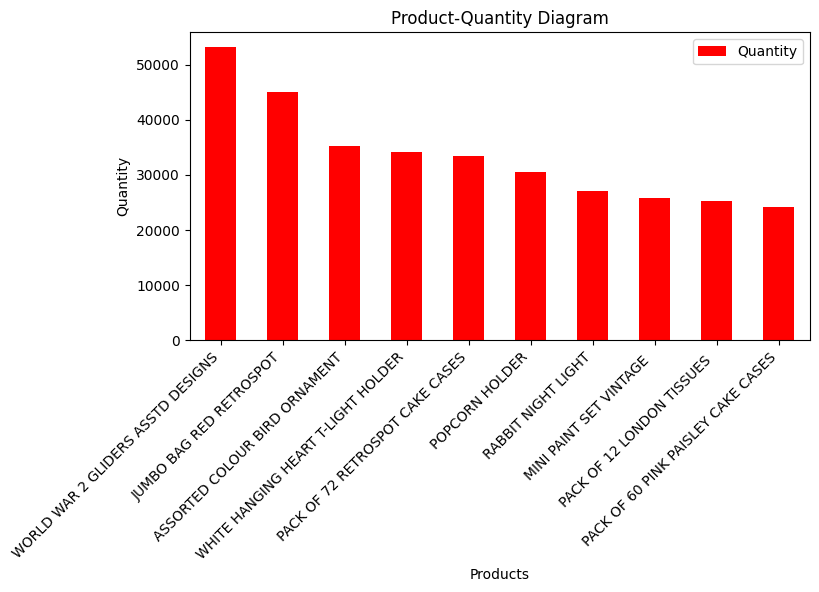

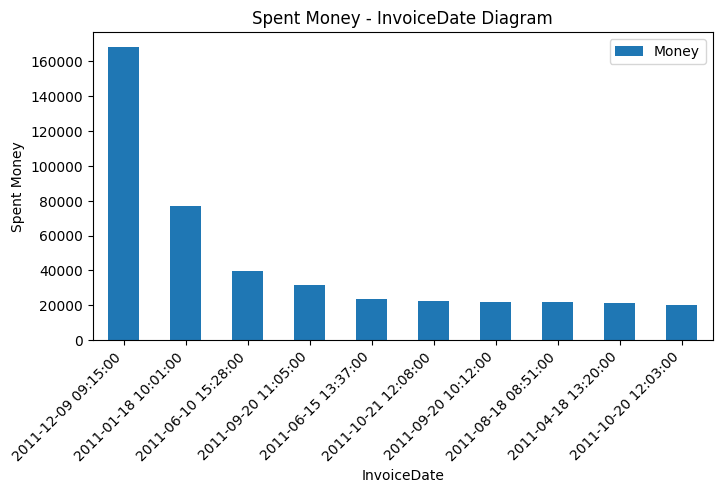

In [25]:
def visualizeProduct():
    
    vis3 = df[["Description","Quantity"]]
    vis3.groupby("Description").sum().sort_values("Quantity",ascending=False).head(n=10).plot(kind="bar",figsize=(8,4),color="r")
    plt.title("Product-Quantity Diagram")
    plt.xticks(rotation=45, ha='right')
    plt.xlabel("Products")
    plt.ylabel("Quantity")
def visualizeInvoiceDate():

    df["Money"]=df["UnitPrice"]*df["Quantity"]
    vis4 = df[["InvoiceDate", "Money"]]
    vis4.groupby("InvoiceDate").sum().sort_values("Money", ascending=False).head(10).plot(kind="bar",figsize=(8, 4))
    plt.title("Spent Money - InvoiceDate Diagram")
    plt.xticks(rotation=45, ha='right')
    plt.xlabel("InvoiceDate")
    plt.ylabel("Spent Money")
    plt.show()
def visualizeCountry():

    vis1 = df[["Country", "InvoiceNo"]]
    vis1.drop_duplicates("InvoiceNo")
    vis1.groupby("Country").count().sort_values("InvoiceNo", ascending=False).head(10).plot(figsize=(8, 4))
    plt.title("Order-Country Diagram")
    plt.xlabel("Countries")
    plt.ylabel("Number of Orders")
    plt.show()
def visualizeCustomer():

    vis2 = df[["CustomerID", "Country"]]
    vis2dup = vis2.drop_duplicates("CustomerID")
    vis2dup["Country"].value_counts().head(10).plot(kind="bar",figsize=(8, 4), color="k")
    plt.title("Customer - Country Diagram")
    plt.xticks(rotation=45, ha='right')
    plt.xlabel("Country")
    plt.ylabel("Customer")
    plt.show()



visualizeCountry()
visualizeCustomer()
visualizeProduct()
visualizeInvoiceDate()
